# Packages

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 

from pandas.io.json import json_normalize
from sklearn import cluster, preprocessing
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import set_matplotlib_formats

# Dataframe retrieval

In [2]:
# open Budget dataframe
with open('static_dic/budgets_idf.json') as file:
    data = json.load(file)

df_budget = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_budget.set_index('code', inplace=True)

In [3]:
# open Chomage dataframe
with open('static_dic/chomage.json') as file:
    data = json.load(file)

df_chomage = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_chomage.set_index('code', inplace=True)

In [4]:
# open Partis dataframe
with open('static_dic/partisidf.json') as file:
    data = json.load(file)

df_partis = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_partis.set_index('code', inplace=True)

In [5]:
# open Logmement dataframe
with open('static/logement.json') as file:
    data = json.load(file)

df_logement = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_logement.set_index('inseecode', inplace=True)

In [6]:
# open Bac dataframe
with open('static_dic/Bac_js2.json') as file:
    data = json.load(file)

df_bac = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_bac.set_index('Code', inplace=True)

In [7]:
# open Sirene dataframe
with open('static_dic/sirene_IDF_01_01_18.json') as file:
    data = json.load(file)

df_siren = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_siren.set_index('Insee', inplace=True)

#print(df_siren.index.duplicated())
#print(df_siren.index.values)
#print((df_siren.index.values[df_siren.index.duplicated()]))

In [8]:
# open population dataframe
with open('static_dic/population.json') as file:
    data = json.load(file)

df_population = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_population.set_index('code', inplace=True)

#df_population.columns

In [9]:
# open gps dataframe
with open('static_dic/city_geo.json') as file:
    data = json.load(file)

df_citygeo = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_citygeo.set_index('code', inplace=True)

# Full dataframe preprocessing

In [10]:
# concatenate dataframes 
df = pd.concat([df_siren, df_bac, df_budget, df_chomage, df_logement, df_partis, df_population, df_citygeo], axis=1, join='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 75101 to 78505
Columns: 456 entries, ETI_rate to geo_y
dtypes: float64(452), object(4)
memory usage: 4.5+ MB


In [234]:
df[['chomage', 'partis.2014']].to_csv('chomageR.csv', index=False, header=True)

In [11]:
df.head(5)

,ETI_rate,Employee_0_rate,Employee_1000_1999_rate,Employee_100_199_rate,Employee_10_19_rate,Employee_1_2_rate,Employee_2000_4999_rate,Employee_200_249_rate,Employee_20_49_rate,Employee_250_499_rate,...,Pop2009,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,Pop2015,nom,geo_x,geo_y
75101,824.0,17944.0,0.0,47.0,655.0,3652.0,0.0,12.0,345.0,12.0,...,17614.0,17308.0,17443.0,17100.0,17022.0,16717.0,16545.0,PARIS 1ER ARRONDISSEMENT,48.862630,2.336293
75102,645.0,18732.0,0.0,68.0,875.0,3785.0,0.0,18.0,450.0,18.0,...,22400.0,23009.0,22927.0,22390.0,21741.0,21263.0,20796.0,PARIS 2E ARRONDISSEMENT,48.867903,2.344107
75103,290.0,16193.0,0.0,10.0,421.0,3110.0,0.0,2.0,169.0,8.0,...,35655.0,35652.0,36120.0,35991.0,35666.0,35077.0,35049.0,PARIS 3E ARRONDISSEMENT,48.863054,2.359361
75104,252.0,11928.0,0.0,22.0,336.0,2257.0,0.0,2.0,148.0,6.0,...,28192.0,28012.0,27887.0,27769.0,27335.0,26796.0,27146.0,PARIS 4E ARRONDISSEMENT,48.854228,2.357362
75105,385.0,17501.0,0.0,32.0,395.0,2945.0,0.0,9.0,177.0,19.0,...,61531.0,60938.0,60800.0,60179.0,60273.0,60030.0,59333.0,PARIS 5E ARRONDISSEMENT,48.844509,2.349859


In [12]:
df.columns.values

array(['ETI_rate', 'Employee_0_rate', 'Employee_1000_1999_rate',
       'Employee_100_199_rate', 'Employee_10_19_rate', 'Employee_1_2_rate',
       'Employee_2000_4999_rate', 'Employee_200_249_rate',
       'Employee_20_49_rate', 'Employee_250_499_rate', 'Employee_3_5_rate',
       'Employee_5000_9999_rate', 'Employee_500_999_rate',
       'Employee_50_99_rate', 'Employee_6_9_rate',
       'Employee_over_10000_rate', 'Firms_Nb', 'GE_rate', 'PME_rate',
       'NbLycees_2008', 'NbLycees_2009', 'NbLycees_2010', 'NbLycees_2011',
       'NbLycees_2012', 'NbLycees_2013', 'NbLycees_2014', 'NbLycees_2015',
       'NbLycees_2016', 'NbLycees_2017', 'Privé_2008', 'Privé_2009',
       'Privé_2010', 'Privé_2011', 'Privé_2012', 'Privé_2013',
       'Privé_2014', 'Privé_2015', 'Privé_2016', 'Privé_2017',
       'Public_2008', 'Public_2009', 'Public_2010', 'Public_2011',
       'Public_2012', 'Public_2013', 'Public_2014', 'Public_2015',
       'Public_2016', 'Public_2017', 'Resultat_2008_(50)',
      

### Introduction of new features 

In [237]:
df['PME_rate'] = df['PME_rate'] / df['Firms_Nb']
df['ETI_rate'] = df['ETI_rate'] / df['Firms_Nb']
df['GE_rate'] = df['GE_rate'] / df['Firms_Nb']

df[['PME_rate','ETI_rate','GE_rate']].describe()

,PME_rate,ETI_rate,GE_rate
count,523.000000,523.000000,523.000000
mean,0.581388,0.021466,0.017221
std,0.037117,0.019640,0.015366
min,0.445693,0.000000,0.000000
25%,0.561609,0.007818,0.009162
50%,0.583727,0.016856,0.014052
75%,0.604578,0.029041,0.020944
max,0.703625,0.191011,0.177903


In [238]:
# Create new feature for bac : excellence ratio 
df['Ratio_Resultat_2014_(90)'] = df['Resultat_2014_(90)'] / df['NbLycees_2014']
df['Ratio_Resultat_2014_(90)'].describe()

count    225.000000
mean       0.603138
std        0.426719
min        0.000000
25%        0.000000
50%        0.714286
75%        1.000000
max        1.000000
Name: Ratio_Resultat_2014_(90), dtype: float64

In [239]:
# Create new feature for bac : average score of Lycees in a city in 2014
df['Ratio_Resultat_2014'] = (df['Resultat_2014_(90)']*1 +
                             df['Resultat_2014_(80-90)']*0.9 +
                             df['Resultat_2014_(70-80)']*0.8 +
                             df['Resultat_2014_(50-70)']*0.7 +
                             df['Resultat_2014_(50)']*0.5 ) / df['NbLycees_2014']
df['Ratio_Resultat_2014'].describe()

count    225.000000
mean       0.951827
std        0.057172
min        0.700000
25%        0.900000
50%        0.966667
75%        1.000000
max        1.000000
Name: Ratio_Resultat_2014, dtype: float64

In [240]:
# Charges personnel / depenses
df['Ratio_personnel_2014'] = df['d1.2_2014'] / df['depenses_2014']
df['Ratio_personnel_2008'] = df['d1.2_2008'] / df['depenses_2008']
df['Ratio_personnel_2001'] = df['d1.2_2001'] / df['depenses_2001']
# Charge de personnel par habitant
df['Cout_personnel_hab_2014'] = df['d1.2_2014'] / df['Pop2014']
df['Cout_personnel_hab_2008'] = df['d1.2_2008'] / df['Pop2008']
df['Cout_personnel_hab_2001'] = df['d1.2_2001'] / df['Pop1999']

# Impot local par habitant
df['Impot_hab_2014'] = df['r1.3_2014'] / df['Pop2014']
df['Impot_hab_2008'] = df['r1.3_2008'] / df['Pop2008']
df['Impot_hab_2001'] = df['r1.3_2001'] / df['Pop1999']

# Budget = Investissement + Fonctionnement
# Invest / Budget
df['Ratio_investissement_2014'] = (df['r2_2014'] + df['d2_2014']) / df['budget_2014']
df['Ratio_investissement_2008'] = (df['r2_2008'] + df['d2_2008']) / df['budget_2008']
df['Ratio_investissement_2001'] = (df['r2_2001'] + df['d2_2001']) / df['budget_2001']
# Fonct / Budget
df['Ratio_fonctionnement_2014'] = (df['r1_2014'] + df['d1_2014']) / df['budget_2014']
df['Ratio_fonctionnement_2008'] = (df['r1_2008'] + df['d1_2008']) / df['budget_2008']
df['Ratio_fonctionnement_2001'] = (df['r1_2001'] + df['d1_2001']) / df['budget_2001']

# Budget par habitant
df['budget_hab_2001'] = df['budget_2001'] / df['Pop1999']
df['budget_hab_2008'] = df['budget_2008'] / df['Pop2008']
df['budget_hab_2014'] = df['budget_2014'] / df['Pop2014']

In [13]:
# 2014 parties in categories 
df['partis.2014'] = df['partis.2014'].map({"FN" : 'Droite',
                            "UMP-LR" : 'Droite',
                            "DVD" : 'Droite',
                            "UDI" : 'Droite',
                            "SE" : 'Centre',
                            "MoDem" : 'Centre',
                            "PRG" : 'Centre',
                            "EELV" : 'Gauche',
                            "DVG" : 'Gauche',
                            "PS" : 'Gauche',
                            "FG" : 'Gauche',
                            "PCF" : 'Gauche',
                            "NA" : 'Indefini'})

df_partis_dummies_2014 = pd.get_dummies(df['partis.2014'], prefix="partis.2014", dummy_na=True)
df_partis_dummies_2014['partis.2014_Indefini'] = df_partis_dummies_2014['partis.2014_Indefini'] + df_partis_dummies_2014['partis.2014_nan']
df_partis_dummies_2014 = df_partis_dummies_2014.drop('partis.2014_nan', axis=1)

df = pd.concat([df.drop('partis.2014',axis=1), df_partis_dummies_2014], axis=1)

# 2008 parties in categories 
df['partis.2008'] = df['partis.2008'].map({"FN" : 'Droite',
                            "UMP-LR" : 'Droite',
                            "DVD" : 'Droite',
                            "UDI" : 'Droite',
                            "SE" : 'Centre',
                            "MoDem" : 'Centre',
                            "PRG" : 'Centre',
                            "EELV" : 'Gauche',
                            "DVG" : 'Gauche',
                            "PS" : 'Gauche',
                            "FG" : 'Gauche',
                            "PCF" : 'Gauche',
                            "NA" : 'Indefini'})

df_partis_dummies_2008 = pd.get_dummies(df['partis.2008'], prefix="partis.2008", dummy_na=True)
df_partis_dummies_2008['partis.2008_Indefini'] = df_partis_dummies_2008['partis.2008_Indefini'] + df_partis_dummies_2008['partis.2008_nan']
df_partis_dummies_2008 = df_partis_dummies_2008.drop('partis.2008_nan', axis=1)

df = pd.concat([df.drop('partis.2008',axis=1), df_partis_dummies_2008], axis=1)

# 2001 parties in categories
df['partis.2001'] = df['partis.2001'].map({"FN" : 'Droite',
                            "UMP-LR" : 'Droite',
                            "DVD" : 'Droite',
                            "UDI" : 'Droite',
                            "SE" : 'Centre',
                            "MoDem" : 'Centre',
                            "PRG" : 'Centre',
                            "EELV" : 'Gauche',
                            "DVG" : 'Gauche',
                            "PS" : 'Gauche',
                            "FG" : 'Gauche',
                            "PCF" : 'Gauche',
                            "NA" : 'Indefini'})

df_partis_dummies_2001 = pd.get_dummies(df['partis.2001'], prefix="partis.2001", dummy_na=True)
df_partis_dummies_2001['partis.2001_Indefini'] = df_partis_dummies_2001['partis.2001_Indefini'] + df_partis_dummies_2001['partis.2001_nan']
df_partis_dummies_2001 = df_partis_dummies_2001.drop('partis.2001_nan', axis=1)

df = pd.concat([df.drop('partis.2001',axis=1), df_partis_dummies_2001], axis=1)


In [202]:
# Encode categorical features for parties
encoder = {"partis.2001" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8,
                            "NA" : 0.01},
            "partis.2008" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8,
                            "NA" : 0.01},
           "partis.2014" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8,
                            "NA" : 0.01}
          }

df.replace(encoder, inplace=True)

In [242]:
df['Pop2007_evo'] = (df['Pop2007'] - df['Pop2006']) / df['Pop2006']
df['Pop2008_evo'] = (df['Pop2008'] - df['Pop2007']) / df['Pop2007']
df['Pop2009_evo'] = (df['Pop2009'] - df['Pop2008']) / df['Pop2008']
df['Pop2010_evo'] = (df['Pop2010'] - df['Pop2009']) / df['Pop2009']
df['Pop2011_evo'] = (df['Pop2011'] - df['Pop2010']) / df['Pop2010']
df['Pop2012_evo'] = (df['Pop2012'] - df['Pop2011']) / df['Pop2011']
df['Pop2013_evo'] = (df['Pop2013'] - df['Pop2012']) / df['Pop2012']
df['Pop2014_evo'] = (df['Pop2014'] - df['Pop2013']) / df['Pop2013']
df['Pop2015_evo'] = (df['Pop2015'] - df['Pop2014']) / df['Pop2014']

In [204]:
df['partis.2014'].sort_values()

77166   -1.000000
95387   -0.125000
77225   -0.104396
77021   -0.077348
77193   -0.065693
77304   -0.062500
78194   -0.053719
78439   -0.048077
77402   -0.047493
95492   -0.042254
77190   -0.040984
77022   -0.040571
95611   -0.040000
77235   -0.039855
77038   -0.039130
77258   -0.038010
78653   -0.037464
95011   -0.037209
77094   -0.037037
77319   -0.036585
77476   -0.035156
78497   -0.034588
95438   -0.034483
95675   -0.034356
91312   -0.032630
78655   -0.032175
95301   -0.032154
77481   -0.031646
91482   -0.030063
95181   -0.029221
           ...   
91547    0.063877
91022    0.065041
91041    0.066272
78443    0.066820
77137    0.068966
77378    0.072970
78118    0.073310
95002    0.073955
77330    0.075799
78616    0.075928
91689    0.078351
91685    0.079008
77202    0.079545
77268    0.080302
94044    0.081173
95058    0.083785
77526    0.087336
77144    0.087349
77534    0.093656
77080    0.097561
77036    0.110092
77410    0.112084
77392    0.138710
95088    0.141079
77276    0

In [14]:
df[['partis.2014']].to_csv('partisR.csv', index=False, header=True)

KeyError: "['partis.2014'] not in index"

### Rows selection

In [205]:
# We drop NAs for the analysis of parties
print('Before drop NA partis :',  df.shape)
df = df[df['partis.2001'] != 0.01]
df = df[df["partis.2008"] != 0.01]
df = df[df["partis.2014"] != 0.01]
print('After drop NA partis :',  df.shape)

Before drop NA partis : (1302, 469)
After drop NA partis : (511, 469)


In [206]:
# Select the most imprtant cities
print('Before drop small cities :',  df.shape)
df = df[df['Pop2015'] > 50]
print('After drop small cities :',  df.shape)

# Paris outlier
print('Before drop Paris :',  df.shape)
df = df[df['Pop2015'] < 1000000]
print('After drop Paris :',  df.shape)

# get rid of NaNs
#df = df.dropna(axis=0, how='any')

Before drop small cities : (511, 469)
After drop small cities : (508, 469)
Before drop Paris : (508, 469)
After drop Paris : (507, 469)


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 75101 to 78397
Columns: 469 entries, ETI_rate to Pop2015_evo
dtypes: float64(468), object(1)
memory usage: 1.8+ MB


In [208]:
df.describe()

,ETI_rate,Employee_0_rate,Employee_1000_1999_rate,Employee_100_199_rate,Employee_10_19_rate,Employee_1_2_rate,Employee_2000_4999_rate,Employee_200_249_rate,Employee_20_49_rate,Employee_250_499_rate,...,budget_hab_2014,Pop2007_evo,Pop2008_evo,Pop2009_evo,Pop2010_evo,Pop2011_evo,Pop2012_evo,Pop2013_evo,Pop2014_evo,Pop2015_evo
count,309.000000,309.000000,309.0,309.000000,309.000000,309.000000,309.0,309.000000,309.000000,309.000000,...,487.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.024490,4150.553398,0.0,11.485437,117.682848,691.964401,0.0,2.275081,62.983819,4.553398,...,3347.202576,0.007966,0.007232,0.005928,0.006099,0.006866,0.006067,0.008272,0.007846,0.007630
std,0.018693,8766.566540,0.0,19.984993,215.787255,1497.218337,0.0,4.528990,116.780137,8.551291,...,1580.888323,0.021048,0.024652,0.018050,0.020807,0.017251,0.018742,0.021840,0.023056,0.021355
min,0.000000,48.000000,0.0,0.000000,0.000000,6.000000,0.0,0.000000,0.000000,0.000000,...,1007.396450,-0.044776,-0.070922,-0.076336,-0.107923,-0.053571,-0.045332,-0.125000,-0.142857,-0.166667
25%,0.012413,752.000000,0.0,1.000000,20.000000,105.000000,0.0,0.000000,11.000000,0.000000,...,2429.164548,-0.001518,-0.003577,-0.004436,-0.003961,-0.002731,-0.004228,-0.002273,-0.004124,-0.002740
50%,0.019923,1573.000000,0.0,4.000000,47.000000,240.000000,0.0,1.000000,23.000000,1.000000,...,3127.860823,0.005020,0.004733,0.003624,0.004462,0.005099,0.003625,0.005328,0.004308,0.005147
75%,0.032086,2857.000000,0.0,10.000000,104.000000,486.000000,0.0,2.000000,56.000000,4.000000,...,3893.756074,0.014058,0.013675,0.013773,0.012885,0.012781,0.014124,0.015788,0.014540,0.014414
max,0.112987,73742.000000,0.0,169.000000,1961.000000,12111.000000,0.0,42.000000,1181.000000,62.000000,...,17972.669937,0.211009,0.367217,0.110329,0.268262,0.170999,0.142857,0.220717,0.149867,0.121842


# Feature sets definition

In [243]:
features_all = list(df.columns)

features_recent = ['partis.2014', 
            'chomage', 
            'housing',
            'main_res', 
            'portion_hlm_tenant',
            'budget_2015', 
            'd1.2_2015', 
            'd1.3_2015', 
            'd1.4_2015', 
            'd1.5_2015', 
            'd1_2015',
            'd2.1_2015',
            'd2.2_2015',
            'd2.3_2015',
            'd2_2015',
            'depenses_2015',
            'r1.1_2015',
            'r1.2_2015',
            'r1.3_2015',
            'r1_2015',
            'r2.1_2015',
            'r2.2_2015',
            'r2_2015',
            'recettes_2015',
            'NbLycees_2017',
            'Privé_2017',
            'Public_2017',
            'Resultat_2017_(50)',
            'Resultat_2017_(50-70)',
            'Resultat_2017_(70-80)',
            'Resultat_2017_(80-90)',
            'Resultat_2017_(90)'
           ]

features_2001 = ['Ratio_personnel_2001',
            'Cout_personnel_hab_2001',
            'Impot_hab_2001',
            'Ratio_investissement_2001',
            'Ratio_fonctionnement_2001',
            'budget_hab_2001',
            'Pop1999',
            'partis.2001', 
            'budget_2001', 
            'd1.2_2001', 
            'd1.3_2001', 
            'd1.4_2001', 
            'd1.5_2001', 
            'd1_2001',
            'd2.1_2001',
            'd2.2_2001',
            'd2.3_2001',
            'd2_2001',
            'depenses_2001',
            'r1.1_2001',
            'r1.2_2001',
            'r1.3_2001',
            'r1_2001',
            'r2.1_2001',
            'r2.2_2001',
            'r2_2001',
            'recettes_2001'
           ]

features_2008 = ['Ratio_personnel_2008',
            'Cout_personnel_hab_2008',
            'Impot_hab_2008',
            'Ratio_investissement_2008',
            'Ratio_fonctionnement_2008',
            'budget_hab_2008',
            'Pop2008',
            'partis.2008', 
            'budget_2008', 
            'd1.2_2008', 
            'd1.3_2008', 
            'd1.4_2008', 
            'd1.5_2008', 
            'd1_2008',
            'd2.1_2008',
            'd2.2_2008',
            'd2.3_2008',
            'd2_2008',
            'depenses_2008',
            'r1.1_2008',
            'r1.2_2008',
            'r1.3_2008',
            'r1_2008',
            'r2.1_2008',
            'r2.2_2008',
            'r2_2008',
            'recettes_2008'
           ]

features_2014 = ['Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'Ratio_investissement_2014',
            'Ratio_fonctionnement_2014',
            'budget_hab_2014',
            'Pop2014',
            'partis.2014', 
            'budget_2014', 
            'd1.2_2014', 
            'd1.3_2014', 
            'd1.4_2014', 
            'd1.5_2014', 
            'd1_2014',
            'd2.1_2014',
            'd2.2_2014',
            'd2.3_2014',
            'd2_2014',
            'depenses_2014',
            'r1.1_2014',
            'r1.2_2014',
            'r1.3_2014',
            'r1_2014',
            'r2.1_2014',
            'r2.2_2014',
            'r2_2014',
            'recettes_2014'
           ]

# with discrete partis
features_2014_d = [
            'Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'Ratio_investissement_2014',
            'Ratio_fonctionnement_2014',
            'budget_hab_2014',
            'Pop2014',
            'partis.2014_Centre',
            'partis.2014_Droite',
            'partis.2014_Gauche',
            'partis.2014_Indefini',
            'budget_2014', 
            'd1.2_2014', 
            'd1.3_2014', 
            'd1.4_2014', 
            'd1.5_2014', 
            'd1_2014',
            'd2.1_2014',
            'd2.2_2014',
            'd2.3_2014',
            'd2_2014',
            'depenses_2014',
            'r1.1_2014',
            'r1.2_2014',
            'r1.3_2014',
            'r1_2014',
            'r2.1_2014',
            'r2.2_2014',
            'r2_2014',
            'recettes_2014'
           ]

features_2008_d = [
            'Ratio_personnel_2008',
            'Cout_personnel_hab_2008',
            'Impot_hab_2008',
            'Ratio_investissement_2008',
            'Ratio_fonctionnement_2008',
            'budget_hab_2008',
            'Pop2008',
            'partis.2008_Centre',
            'partis.2008_Droite',
            'partis.2008_Gauche',
            'partis.2008_Indefini',
            'budget_2008', 
            'd1.2_2008', 
            'd1.3_2008', 
            'd1.4_2008', 
            'd1.5_2008', 
            'd1_2008',
            'd2.1_2008',
            'd2.2_2008',
            'd2.3_2008',
            'd2_2008',
            'depenses_2008',
            'r1.1_2008',
            'r1.2_2008',
            'r1.3_2008',
            'r1_2008',
            'r2.1_2008',
            'r2.2_2008',
            'r2_2008',
            'recettes_2008'
           ]

features_2001_d = [
            'Ratio_personnel_2001',
            'Cout_personnel_hab_2001',
            'Impot_hab_2001',
            'Ratio_investissement_2001',
            'Ratio_fonctionnement_2001',
            'budget_hab_2001',
            'Pop1999',
            'partis.2001_Centre',
            'partis.2001_Droite',
            'partis.2001_Gauche',
            'partis.2001_Indefini',
            'budget_2001', 
            'd1.2_2001', 
            'd1.3_2001', 
            'd1.4_2001', 
            'd1.5_2001', 
            'd1_2001',
            'd2.1_2001',
            'd2.2_2001',
            'd2.3_2001',
            'd2_2001',
            'depenses_2001',
            'r1.1_2001',
            'r1.2_2001',
            'r1.3_2001',
            'r1_2001',
            'r2.1_2001',
            'r2.2_2001',
            'r2_2001',
            'recettes_2001'
           ]

features_cluster_2014 = [
            'Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'budget_hab_2014',
            'partis.2014',  
#            'Ratio_Resultat_2014',
            'Pop2014_evo'
           ]

features_cluster_2014_d = [
            'Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'budget_hab_2014',
            'Pop2014_evo',
            'Ratio_Resultat_2014',
            'partis.2014_Centre',
            'partis.2014_Gauche',
            'partis.2014_Droite',
            'partis.2014_Indefini'
           ]


features_pop = ['Pop2007_evo',
               'Pop2008_evo',
               'Pop2009_evo',
               'Pop2010_evo',
               'Pop2011_evo',
               'Pop2012_evo',
               'Pop2013_evo',
               'Pop2014_evo',
               'Pop2015_evo',
                'geo_x',
                'geo_y'
              ]

features_2001_cor = ['Ratio_personnel_2001',
            'Cout_personnel_hab_2001',
            'Impot_hab_2001',
            'Ratio_investissement_2001',
            'Ratio_fonctionnement_2001',
            'budget_hab_2001',
            'Pop1999',
            'partis.2001', 
            'budget_2001', 
            'd2.1_2001',
            'd2.3_2001',
            'r2.1_2001',
            'r2.2_2001'
           ]

features_2008_cor = ['Ratio_personnel_2008',
            'Cout_personnel_hab_2008',
            'Impot_hab_2008',
            'Ratio_investissement_2008',
            'Ratio_fonctionnement_2008',
            'budget_hab_2008',
            'Pop2008',
            'partis.2008', 
            'budget_2008', 
            'd2.1_2008',
            'd2.3_2008',
            'r2.1_2008',
            'r2.2_2008'
           ]

features_2014_cor = ['Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'Ratio_investissement_2014',
            'Ratio_fonctionnement_2014',
            'budget_hab_2014',
            'Pop2014',
            'partis.2014', 
            'budget_2014', 
            'd2.1_2014',
            'd2.3_2014',
            'r2.1_2014',
            'r2.2_2014'
           ]

### Reminder on Budget labels
* __d1 : dépenses de fonctionnement__
    - d1.1 : achats et autres charges externes
    - d1.2 : charges de personnel
    - d1.3 : charges financières
    - d1.4 : contingents
    - d1.5 : subventions versées
* __d2 : emplois d'investissements__
    - d2.1 : charges a répartir
    - d2.2 : depenses d’equipement
    - d2.3 : remboursement d'emprunts et dettes assimilées
* __r1 : total des produits de fonctionnement__
    - r1.1 : autres impôts et taxes
    - r1.2 : dotation globale de fonctionnement
    - r1.3 : impots locaux
* __r2 : total des ressources d'investissement__
    - r2.1 : emprunts bancaires et dettes assimilées
    - r2.2 : subventions reçues
    

In [245]:
df[['dette_2014', 'Pop2014', 'partis.2014_Indefini', 'partis.2014_Gauche', 'partis.2014_Droite', 'partis.2014_Centre']].to_csv('detteR.csv', index=False, header=True)

# Data Analysis

shape (1271, 21)


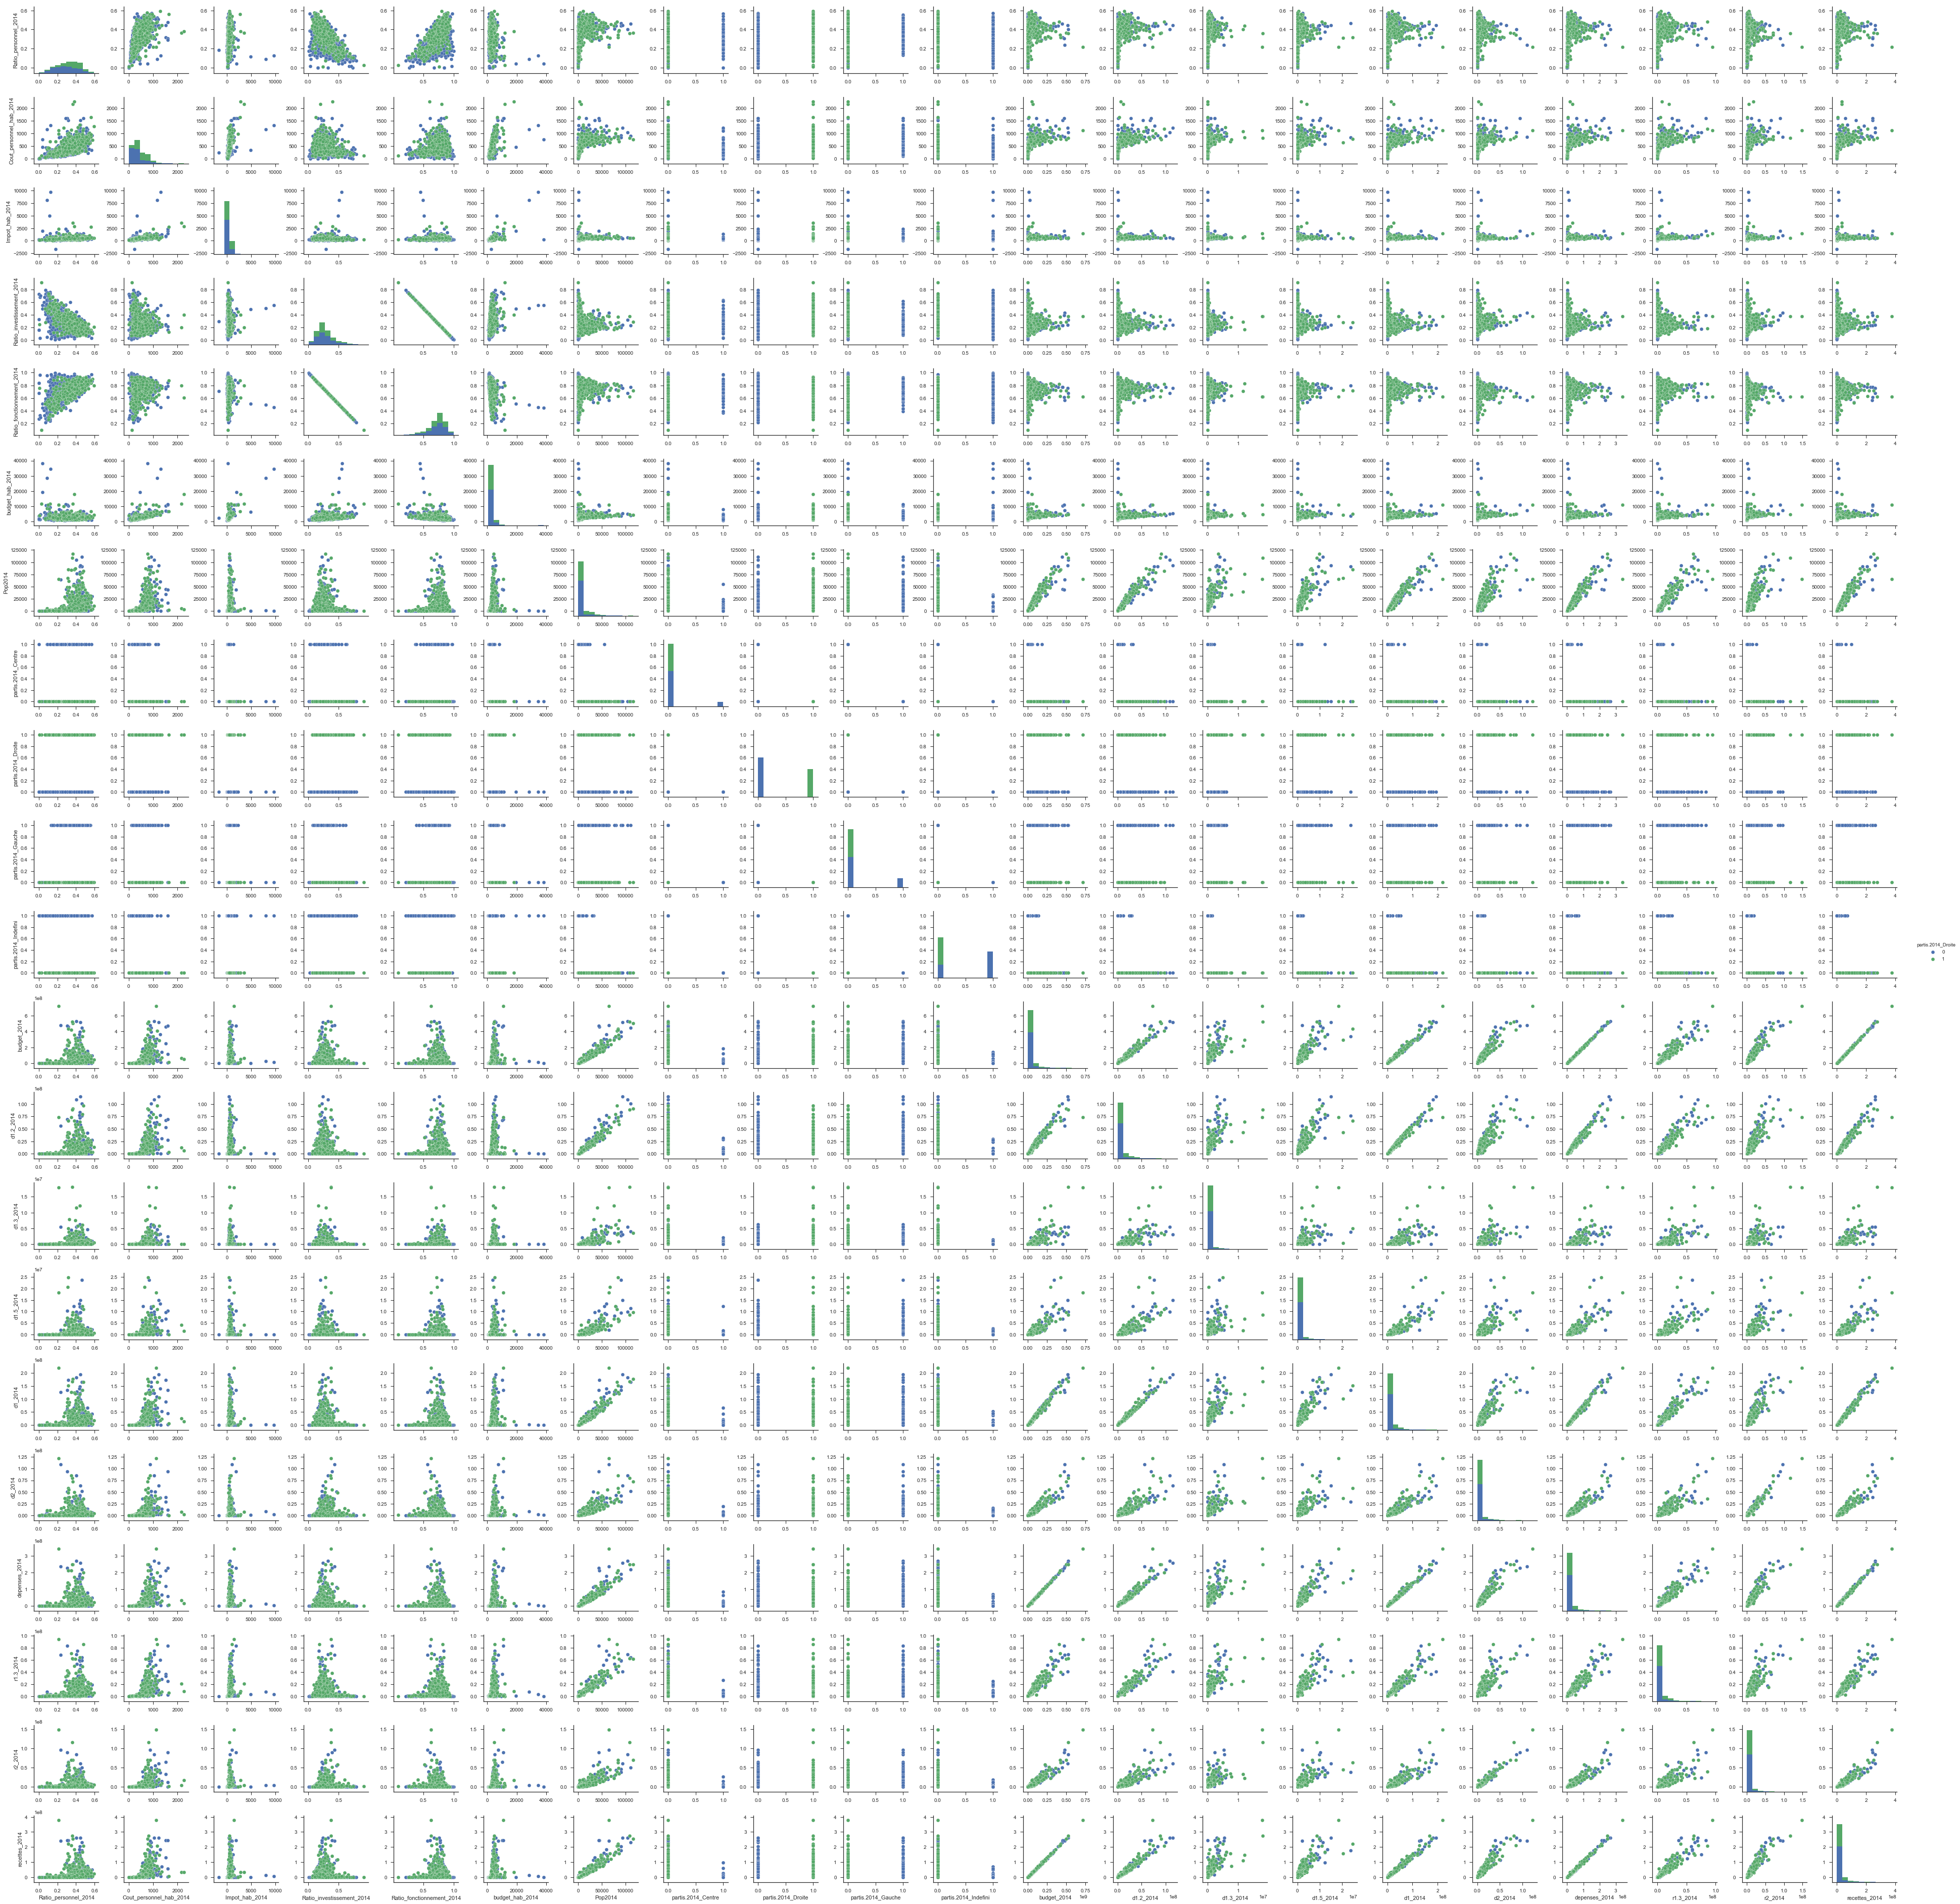

In [157]:
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="ticks")

features_selected = features_2014_d
df_selected = df[features_selected].dropna(axis=0, how='any')
print('shape' , df_selected.shape )
sns.pairplot(df_selected, diag_kind='hist', hue='partis.2014_Droite')

# selection of features for analysis
#features_selected = features_cluster_2014

#scatter_matrix(df[features_selected], alpha=1,
#               figsize=(45, 45), diagonal='kde', labelrotation=45);

# Correlation Analysis

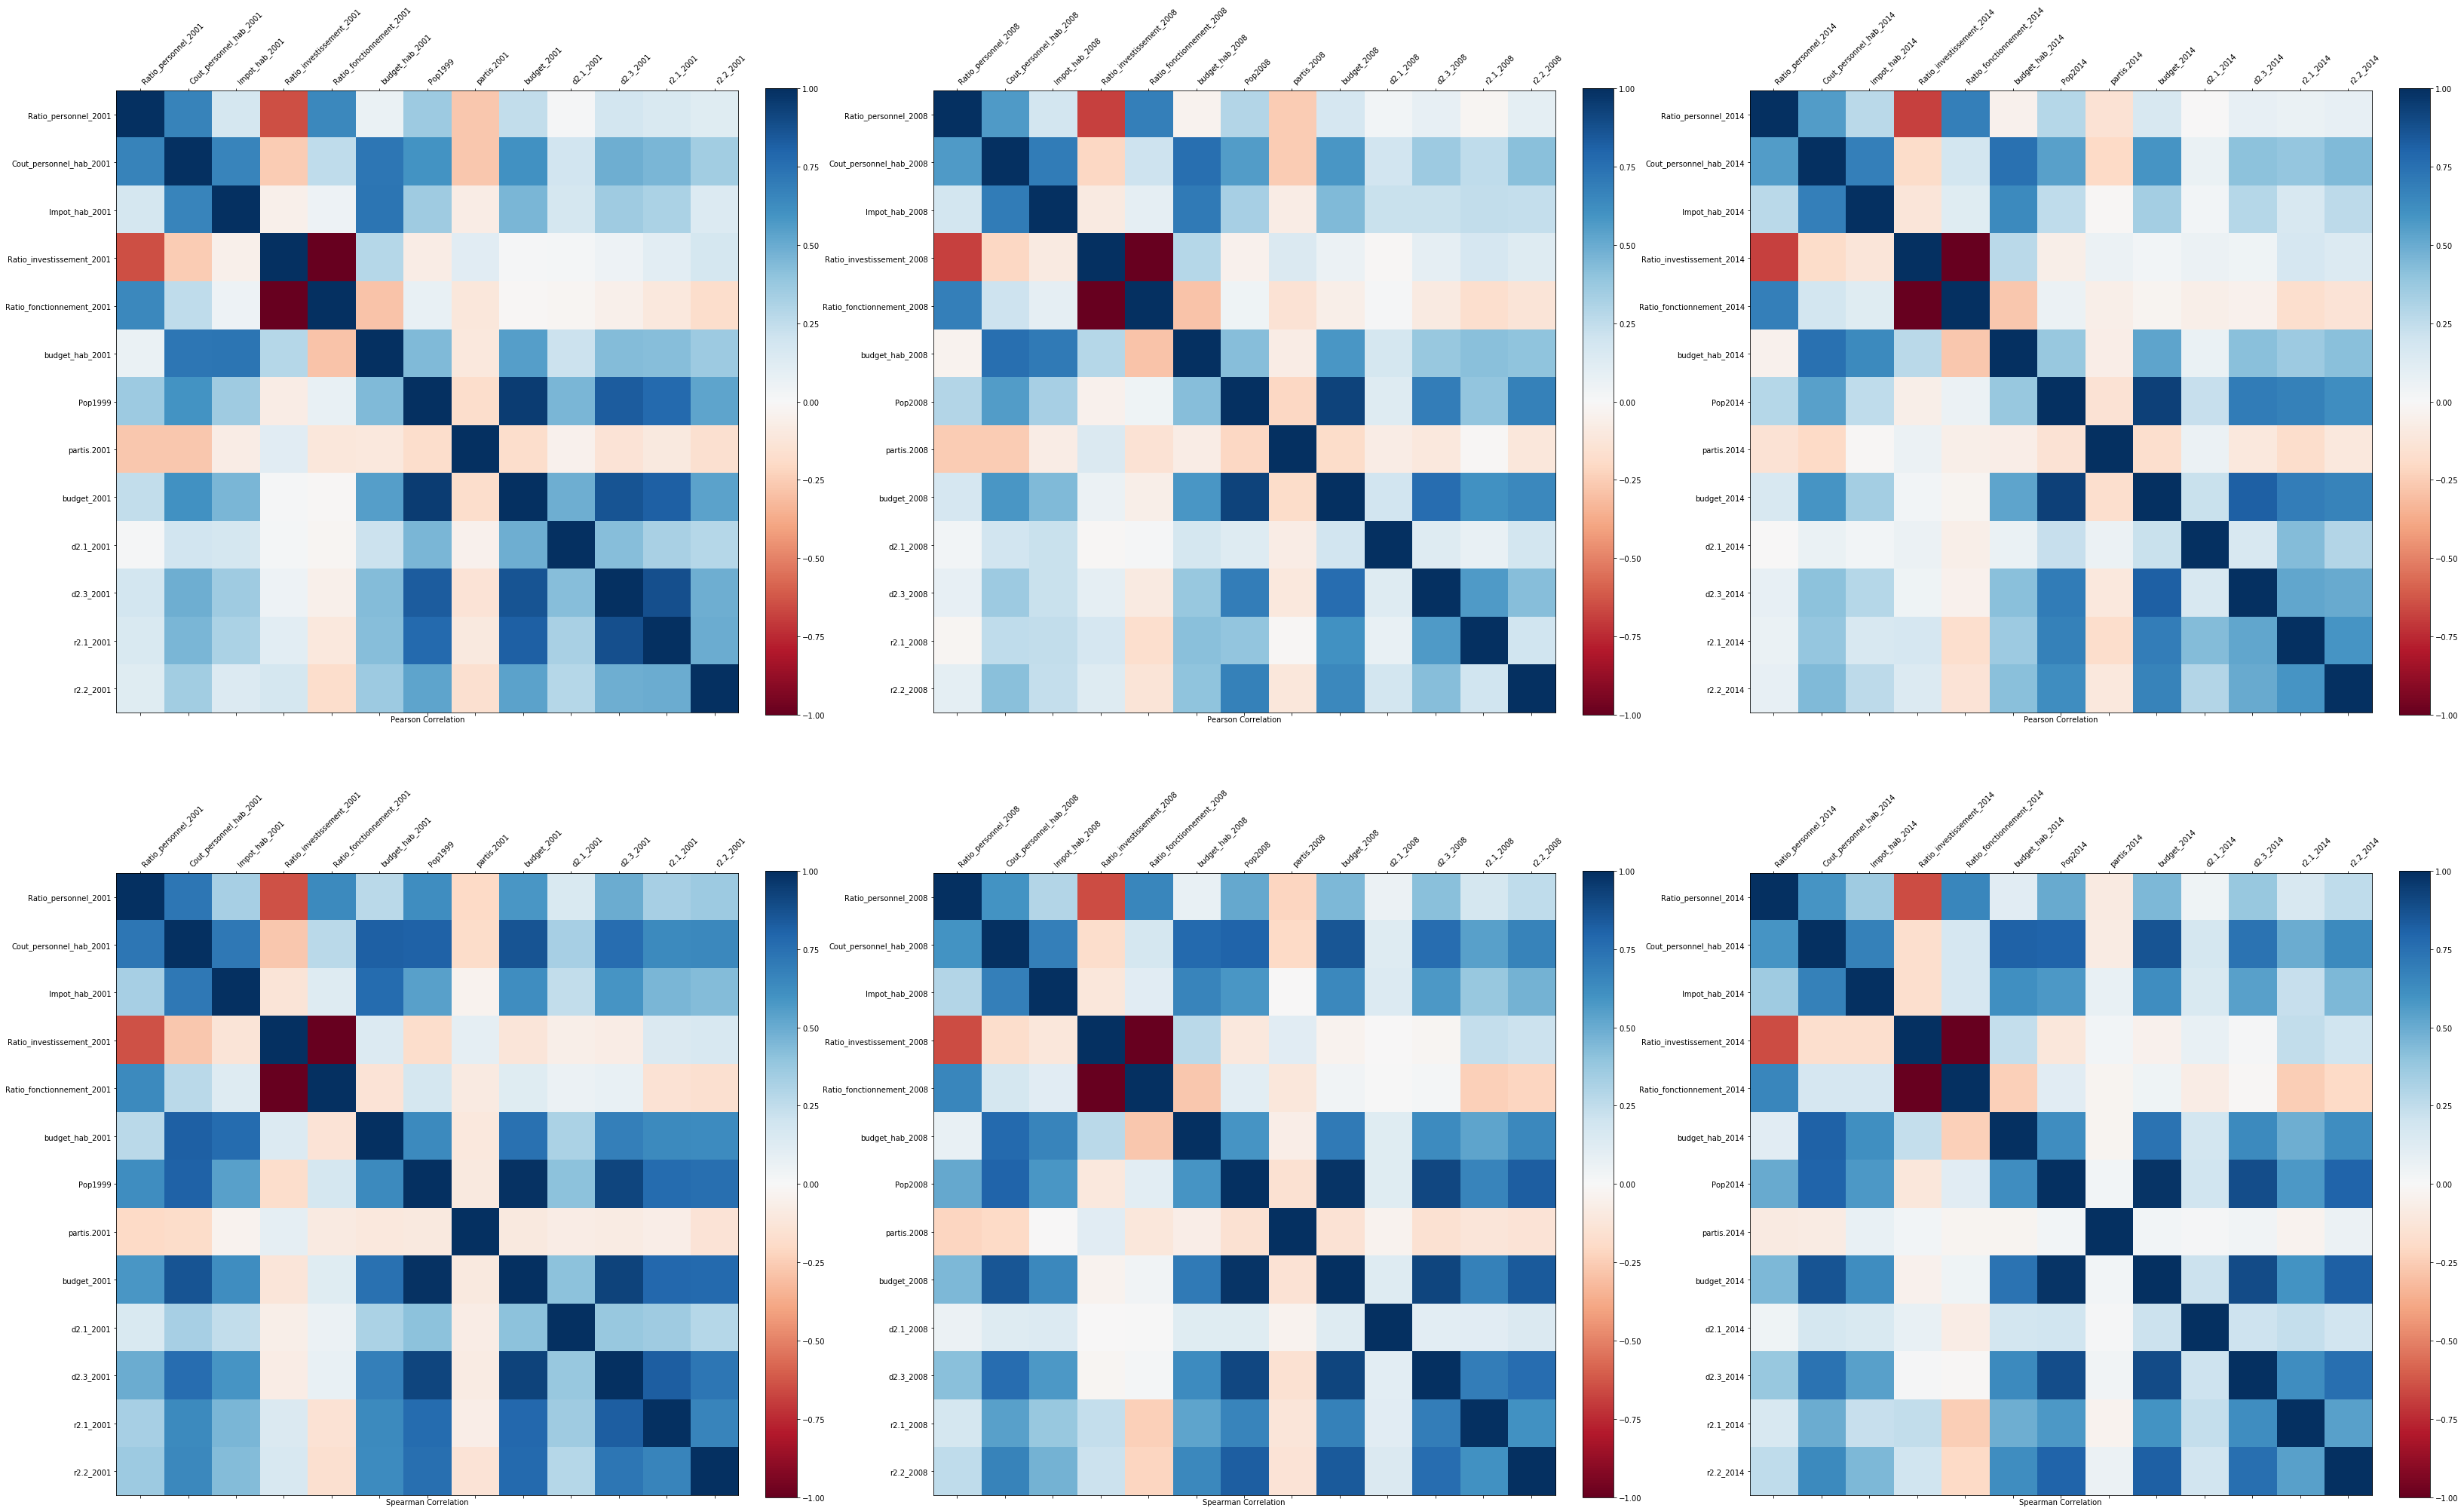

In [210]:
# selection of features for correlations
features_selected = [features_2001_cor, features_2008_cor, features_2014_cor]
l = len(features_selected)

# correlation between features, for years 2001, 2008 and 2014
fig = plt.figure(figsize=(55,35))

for i,feature in enumerate(features_selected):
    correlations = df[feature].corr(method='pearson')
    ax = fig.add_subplot(200+10*l+1+i)
    cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    ticks = np.arange(0,len(feature),1)
    ax.set_xlabel('Pearson Correlation')
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(feature, rotation=45, ha='left')
    ax.set_yticklabels(feature) 

for i,feature in enumerate(features_selected):
    correlations = df[feature].corr(method='spearman')
    ax = fig.add_subplot(200+10*l+4+i)
    cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    ticks = np.arange(0,len(feature),1)
    ax.set_xlabel('Spearman Correlation')
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(feature, rotation=45, ha='left')
    ax.set_yticklabels(feature)
plt.show()

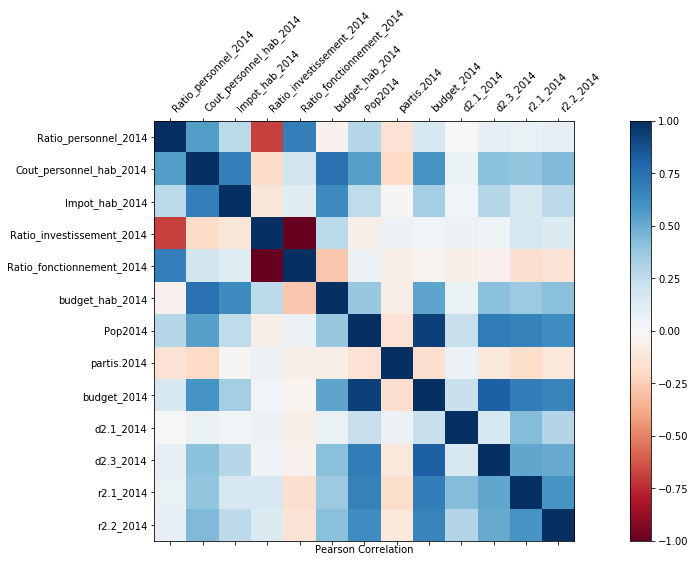

In [222]:
# selection of features for correlations
feature = ['Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'Ratio_investissement_2014',
            'Ratio_fonctionnement_2014',
            'budget_hab_2014',
            'Pop2014',
            'partis.2014', 
            'budget_2014', 
            'd2.1_2014',
            'd2.3_2014',
            'r2.1_2014',
            'r2.2_2014'
           ]

# correlation between features, for years 2001, 2008 and 2014
fig = plt.figure(figsize=(25,17))
correlations = df[feature].corr(method='pearson')
ax = fig.add_subplot(211)
cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)
ticks = np.arange(0,len(feature),1)
ax.set_xlabel('Pearson Correlation')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature, rotation=45, ha='left')
ax.set_yticklabels(feature)
plt.show()

fig.savefig("templates/correlation_matrix_pearson.pdf", bbox_inches='tight')

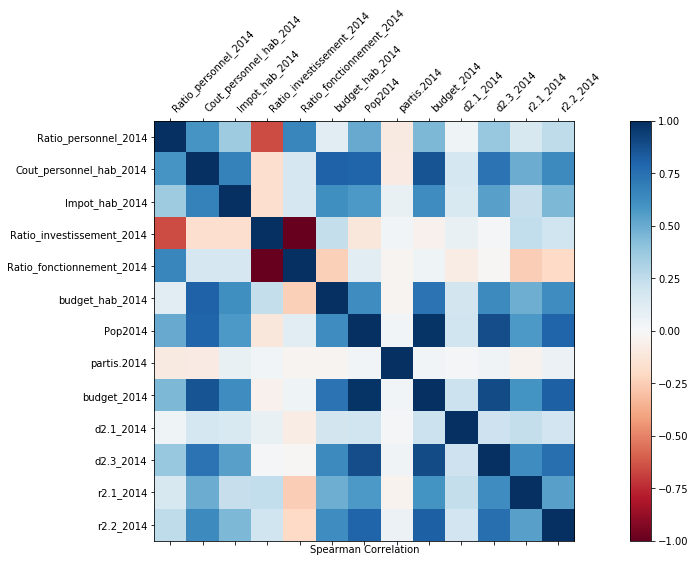

In [223]:
fig = plt.figure(figsize=(25,17))
correlations = df[feature].corr(method='spearman')
ax = fig.add_subplot(212)
cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)
ticks = np.arange(0,len(feature),1)
ax.set_xlabel('Spearman Correlation')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature, rotation=45, ha='left')
ax.set_yticklabels(feature)
plt.show()

fig.savefig("templates/correlation_matrix_spearman.pdf", bbox_inches='tight')

# Clustering

In [146]:
# choose one feature set
features_selected = features_pop
n_features = len(features_selected)

df_selected = df[features_selected].dropna(axis=0, how='any')

data = df_selected.values[:,:-2] #for geo plot
#data = df_selected.values

print('NaN remaining ? :', np.isnan(data).any())

df_selected.info()
# Note : if "Index : 0 entries" is printed under this box, run again the "complete dataframe preprocessing" block

NaN remaining ? : False
<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 75101 to 78505
Data columns (total 11 columns):
Pop2007_evo    1291 non-null float64
Pop2008_evo    1291 non-null float64
Pop2009_evo    1291 non-null float64
Pop2010_evo    1291 non-null float64
Pop2011_evo    1291 non-null float64
Pop2012_evo    1291 non-null float64
Pop2013_evo    1291 non-null float64
Pop2014_evo    1291 non-null float64
Pop2015_evo    1291 non-null float64
geo_x          1291 non-null float64
geo_y          1291 non-null float64
dtypes: float64(11)
memory usage: 121.0+ KB


In [147]:
# Standardize data
scaler = preprocessing.StandardScaler()
data_s = scaler.fit_transform(data)

# Normalize data (be careful with outliers)
normalizer = preprocessing.MinMaxScaler()
data_n = normalizer.fit_transform(data)

Text(0,0.5,'Within group sum of squares')

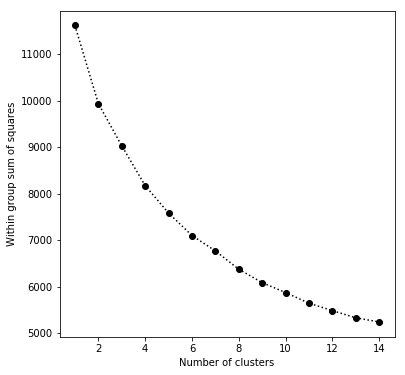

In [148]:
# Elbow analysis to find optimal number of clusters (k)
# ie k that minimizes the sum of squared distances of samples to their closest cluster center

data = data_s

k_range = np.arange(1,15)
clusters_error = []

for k in k_range:
    cluster_k = cluster.KMeans(n_clusters=k)
    cluster_k.fit(data)
    clusters_error.append(cluster_k.inertia_)

plt.figure(figsize=(6,6))
plt.plot(k_range, clusters_error, ':o', c='k')
plt.xlabel('Number of clusters')
plt.ylabel('Within group sum of squares')

In [149]:
# Run KMeans on one of the scaled data 
data = data_s
n_clusters = 4

kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(data)

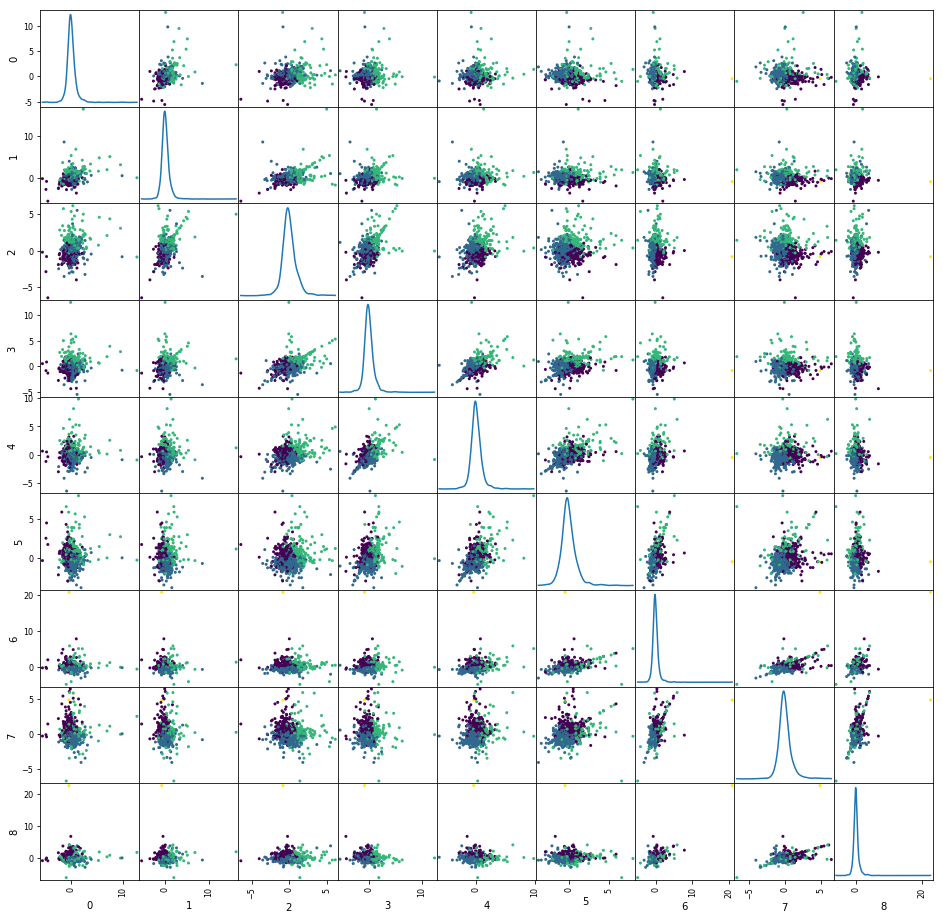

In [150]:
# Plot 2D
from pandas.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(data=data_s), alpha=1,
               figsize=(16, 16), diagonal='kde', c=kmeans.labels_);

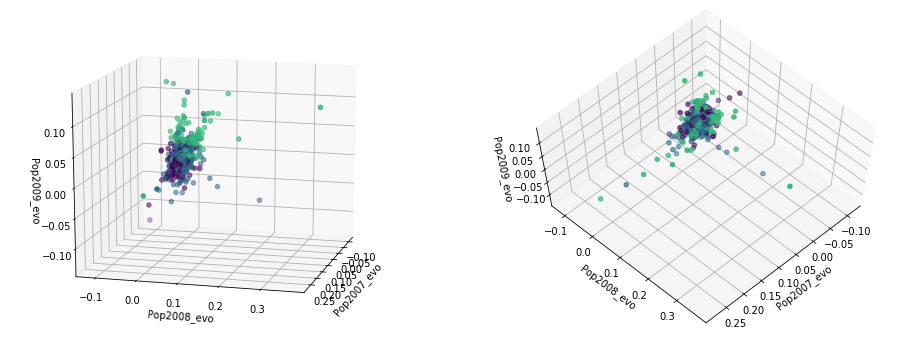

In [151]:
# Plot 3D

ax1 = str(features_selected[0])
ax2 = str(features_selected[1])
ax3 = str(features_selected[2])

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df_selected[ax1], df_selected[ax2], df_selected[ax3], c=kmeans.labels_)
ax.set_xlabel(ax1)
ax.set_ylabel(ax2)
ax.set_zlabel(ax3)
ax.view_init(elev=15., azim=15)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(df_selected[ax1], df_selected[ax2], df_selected[ax3], c=kmeans.labels_)
ax.set_xlabel(ax1)
ax.set_ylabel(ax2)
ax.set_zlabel(ax3)
ax.view_init(elev=65., azim=45)

In [152]:
# Number of points in each cluster

counts = pd.Series(kmeans.labels_).value_counts()

In [154]:
# Cluster centroïds (standardized coordinates...)

centroids = kmeans.cluster_centers_
np.set_printoptions(suppress=True) # To print in a readable format 

centroids_df = pd.DataFrame(data = np.round(scaler.inverse_transform(centroids), 3), columns=features_selected[:-2])
#centroids_df = pd.DataFrame(data = np.round(scaler.inverse_transform(centroids), 3), columns=features_selected)
centroids_df['Nombre de points'] = counts
centroids_df

,Pop2007_evo,Pop2008_evo,Pop2009_evo,Pop2010_evo,Pop2011_evo,Pop2012_evo,Pop2013_evo,Pop2014_evo,Pop2015_evo,Nombre de points
0,0.000,-0.002,-0.002,0.003,0.010,0.014,0.020,0.021,0.015,378
1,0.010,0.009,0.005,0.002,-0.001,-0.003,-0.002,-0.003,-0.000,724
2,0.021,0.028,0.034,0.033,0.029,0.026,0.018,0.012,0.006,188
3,-0.001,-0.011,-0.011,-0.011,-0.003,-0.003,0.574,0.115,0.645,1


Total silhouette score : 0.14235404023


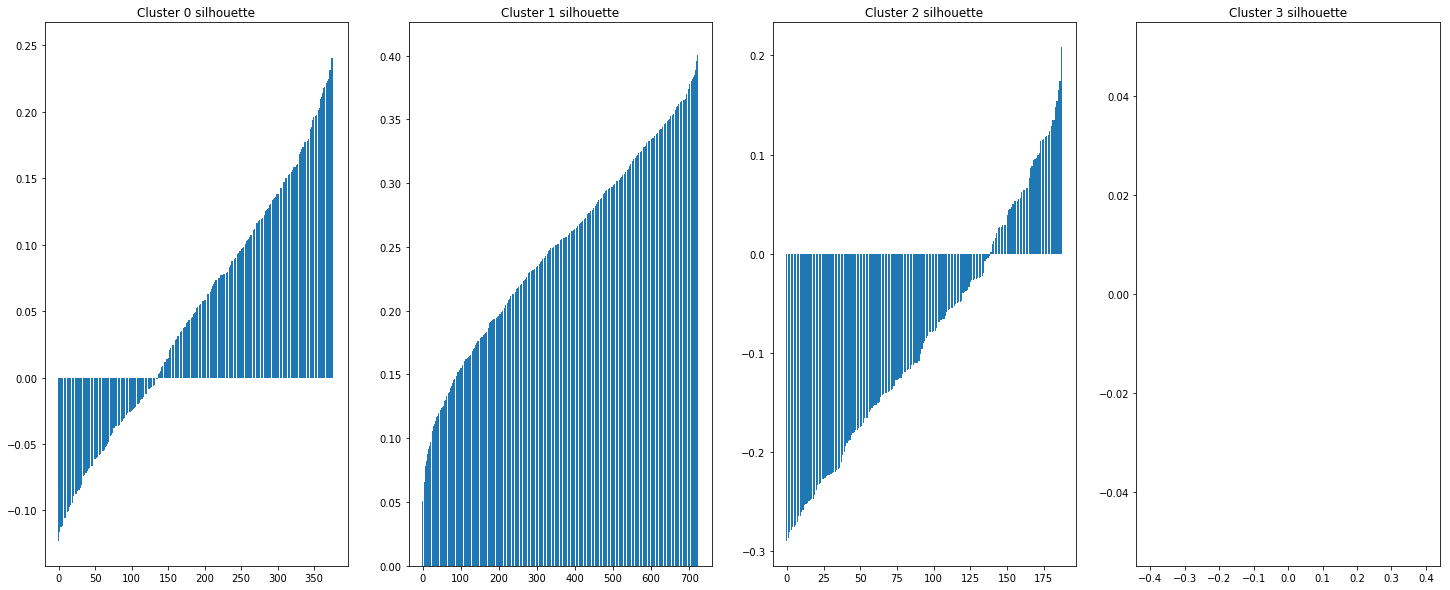

In [155]:
# Metrics to assess the quality of clusters
from sklearn import metrics

sil = metrics.silhouette_samples(data, kmeans.labels_, metric='euclidean')
sil_score = metrics.silhouette_score(data, kmeans.labels_)
print('Total silhouette score :', sil_score)

fig = plt.figure(figsize=(25,10))
for i in range(n_clusters):
    sil_cluster_i = np.sort(sil[kmeans.labels_==i])
    ax = fig.add_subplot(100+10*n_clusters+i+1)
    ax.bar(x=range(len(sil_cluster_i)), height=sil_cluster_i)
    ax.set_title('Cluster {} silhouette'.format(i))
plt.show()

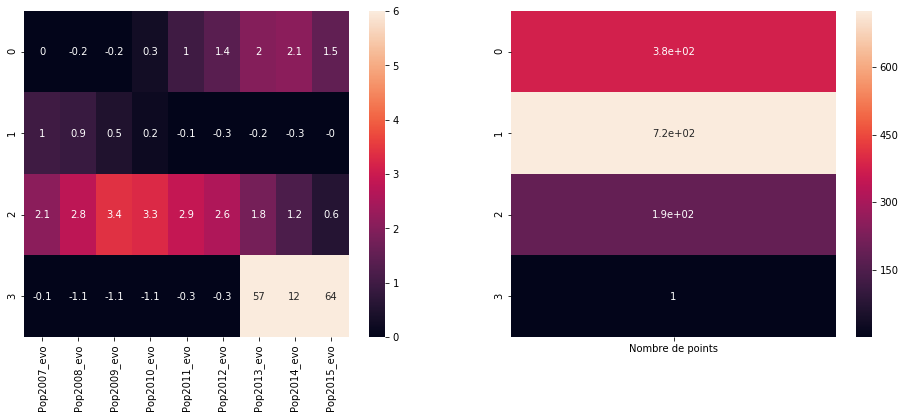

In [156]:
import seaborn as sb

plt.figure(figsize=(16,6))
plt.subplot(121)
sb.heatmap(100*centroids_df[['Pop2007_evo','Pop2008_evo','Pop2009_evo','Pop2010_evo','Pop2011_evo','Pop2012_evo','Pop2013_evo','Pop2014_evo','Pop2015_evo']], annot=True, vmin=0, vmax=6)

plt.subplot(122)
sb.heatmap(1*centroids_df[['Nombre de points']], annot=True)
plt.show()

#centroids_df['Nombre de points']

In [157]:
def city_map(X,Y):
    A = []
    for y in Y:
        if y == "None":
            A.append(-np.cos(48.8 * np.pi / 180))
        else:
            y = float(y)
            y = np.cos(y * np.pi / 180)
            A.append(-y)

    B = []
    for x in X:
        if x == "None":
            B.append(np.sin(2.02 * np.pi / 180))
        else:
            x = float(x)
            x = np.sin(x * np.pi / 180)
            B.append(x)

    return (A,B)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


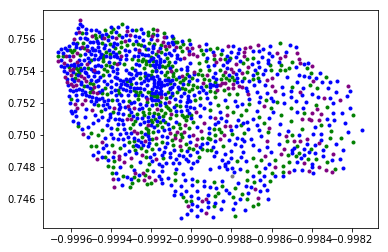

In [159]:
datageo = df_selected[['geo_x','geo_y']]
datageo['label'] = kmeans.labels_
#labels = pd.DataFrame(kmeans.labels_, columns=['label'])
res = pd.DataFrame(datageo)

res0 = res[res['label']==0]
res1 = res[res['label']==1]
res2 = res[res['label']==2]
res3 = res[res['label']==3]

plt.plot(city_map(res0['geo_x'],res0['geo_y'])[0], city_map(res0['geo_x'],res0['geo_y'])[1], '.', c="green")
plt.plot(city_map(res1['geo_x'],res1['geo_y'])[0], city_map(res1['geo_x'],res1['geo_y'])[1], '.', c="blue")
plt.plot(city_map(res2['geo_x'],res2['geo_y'])[0], city_map(res2['geo_x'],res2['geo_y'])[1], '.', c="purple")
plt.plot(city_map(res3['geo_x'],res3['geo_y'])[0], city_map(res3['geo_x'],res3['geo_y'])[1], '.', c="gray")

#plt.plot(res1['geo_x'],res1['geo_y'], 'x', c="red")
#plt.plot(res2['geo_x'],res2['geo_y'], 'x', c="green")
#plt.plot(res3['geo_x'],res3['geo_y'], 'x', c="grey")

In [162]:
datageo['label'].to_csv('static/labels_pop.csv', index=True, header=True)

In [166]:
# With convex hull to visually identify the clusters 
#
#from scipy.spatial import ConvexHull
#from matplotlib.patches import Polygon

#cluster_points = np.array(np.array([
#    np.array([data[p] for p in range(len(data)) if kmeans.labels_[p]==i])
#    for i in range(kmeans.n_clusters)
#    ]))

#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection='3d')

#for c, cluster in enumerate(cluster_points):
#    points = cluster[:]
#    hull = ConvexHull(cluster)
#    simplex = hull.simplices
#    ax.scatter(points[simplex, 0], points[simplex, 1], points[simplex, 2])

## Mini CR de la dernière fois, les pistes à explorer sont :

- etudier temporalité des correlations
- voir résultats attendus et surprenants dans l'analyse des correlation (lire articles de socio, étdues des votants... comme base de comaraison)
- heatmap dans les plot des features, quitte a faire des regressions, afin de faire apparaitres des tendances

- Début Mai : isoler un bout de code (500-1000 lignes) a envoyer aux potes à Jospeh qui peuvent corriger/améliorer notre façon de coder
- Début Mai : Appeler chercheurs Science Po, Universitaires en socio, etc pour discuter des corrélations, éventuellement qu'ils nous parlent d'une question non-résolu à laquelle on pourrait contribuer avec nos données

- Fin Mai : Visualisation indépendantes des chercheurs (à nous) 
- Fin du projet : un beau code, un rapport
- Fin projet : une belle analyse avec des visu et des inputs de chercheurs et sociologues

# CR - 11 Mai 
- Ratios pour les investissements
- Méthodes lasso (ou autres) pour réduire le nombre de features
- Prédire le clusters pour une nouvelle donnée
- Faire plein plein de graphes, pour pouvoir en interpreter certains (tester d'autres modèles, ...)
- Etudiants de Science Po (Fb), ça nous aidera à avoir des indicateurs pertinents 
- Répartition des taches : 
    - PE : contact Science Po
    - RV & Nico : Prediction temporelle
    - Clement & José : Cluster/Correlation
